# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option("display.max_columns", None)

---

# Thu thập dữ liệu

**Dữ liệu được sử dụng trong NoteBook này là thông tin về các khách hàng tham gia cuộc khảo sát để tìm ra khách hàng lý tưởng. Để giúp cho doanh nghiệp hiểu tốt hơn về khách hàng**
> **Context**\
**Problem Statement**\
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
>
>Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

**Phần mô tả của dữ liệu:**
>**Attributes**\
**People**
>
>- ID: Customer's unique identifier
>- Year_Birth: Customer's birth year
>- Education: Customer's education level
>- Marital_Status: Customer's marital status
>- Income: Customer's yearly household income
>- Kidhome: Number of children in customer's household
>- Teenhome: Number of teenagers in customer's household
>- Dt_Customer: Date of customer's enrollment with the company
>- Recency: Number of days since customer's last purchase
>- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
>
>**Products**
>
>- MntWines: Amount spent on wine in last 2 years
>- MntFruits: Amount spent on fruits in last 2 years
>- MntMeatProducts: Amount spent on meat in last 2 years
>- MntFishProducts: Amount spent on fish in last 2 years
>- MntSweetProducts: Amount spent on sweets in last 2 years
>- MntGoldProds: Amount spent on gold in last 2 years
>
>**Promotion**
>
>- NumDealsPurchases: Number of purchases made with a discount
>- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
>- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
>- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
>- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
>- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
>- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
>
>**Place**
>
>- NumWebPurchases: Number of purchases made through the company’s website
>- NumCatalogPurchases: Number of purchases made using a catalogue
>- NumStorePurchases: Number of purchases made directly in stores
>- NumWebVisitsMonth: Number of visits to company’s website in the last month

**Dữ liệu này được Public trên trang Kaggle nhằm mục đích học tập với license như sau:**
> License CC0: Public Domain


**Cám ơn [LavanyaAkash Patel](https://www.kaggle.com/imakash3011) đã cung cấp tập dữ liệu này**


**Mình download dữ liệu tại đây [kaggle](https://www.kaggle.com/imakash3011/customer-personality-analysis)**

---

# Khám phá dữ liệu

## Đọc dữ liệu từ file .csv

In [2]:
mkt_df = pd.read_csv("../Data/marketing_campaign.csv", sep='\t')

In [3]:
mkt_df = pd.read_csv("../Data/marketing_campaign.csv", sep='\t') # mkt = marketing
mkt_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [4]:
mkt_df_nrows, mkt_df_ncols = mkt_df.shape
print(f"Marketing dataset have {mkt_df_nrows} rows and {mkt_df_ncols} columns")

Marketing dataset have 2240 rows and 29 columns


## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Theo Kaggle, mỗi dòng là thông tin cá nhân + thông tin mua hàng của 1 khách hàng. Nhìn chung các dòng có cùng ý nghĩa với nhau

## Dữ liệu có các dòng bị lặp không?

In [5]:
num_duplicated_apps = mkt_df.duplicated().sum()
num_duplicated_ids = mkt_df['ID'].duplicated().sum()

print(f"Number of duplicated rows in Marketing dataset: {num_duplicated_apps}")
print(f"Number of duplicated ids in Marketing dataset: {num_duplicated_ids}")

Number of duplicated rows in Marketing dataset: 0
Number of duplicated ids in Marketing dataset: 0


$\to$ Các dòng không bị trùng nhau hoàn toàn hoặc trùng nhau về ID

## Mỗi cột có ý nghĩa gì?

Ý nghĩa của các cột được lưu vào file `columns_explain.csv`, ta sẽ đọc file này vào 1 dataframe gồm 2 cột tên là `Attribute` và `Meaning`

In [6]:
pd.set_option('display.max_colwidth', None) # in đầy đủ thông tin, thay vì "..." 
pd.read_csv('../Data/columns_explain.csv', sep='\t', names = ['Attribute', 'Meaning'])

,Attribute,Meaning
0,ID,Customer's unique identifier
1,Year_Birth,Customer's birth year
2,Education,Customer's education level
3,Marital_Status,Customer's marital status
4,Income,Customer's yearly household income
5,Kidhome,Number of children in customer's household
6,Teenhome,Number of teenagers in customer's household
7,Dt_Customer,Date of customer's enrollment with the company
8,Recency,Number of days since customer's last purchase
9,Complain,"1 if the customer complained in the last 2 years, 0 otherwise"


Thấy rằng tổng cộng có 29 thuộc tính nhưng chỉ có 27 thuộc tính được mô tả, thiếu 2 thuộc tính `Z_CostContact` và `Z_Revenue`. Vì không rõ ý nghĩa của 2 thuộc tính này nên nhóm quyết định bỏ đi 2 cột này. Mặt khác, chính tác giả trong 1 bài discussion trên kaggle cũng nói rằng nên bỏ 2 cột này đi (Link discussion: https://www.kaggle.com/imakash3011/customer-personality-analysis/discussion/267556)

Ngoài ra, theo mô tả cột `Response` thì nó chính là AcceptedCmp thứ 6, hay `AcceptedCmp6`

In [7]:
mkt_df = mkt_df.drop(columns=['Z_CostContact', 'Z_Revenue']) # bỏ đi 2 cột
mkt_df.rename(columns={'Response': 'AcceptedCmp6'}, inplace=True) # đổi tên cột Response
mkt_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'AcceptedCmp6'],
      dtype='object')

## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [8]:
mkt_df.dtypes.to_frame(name='type')

,type
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


Cột `Dt_Customer` nên có kiểu dữ liệu dạng ngày tháng, nhưng hiện giờ đang có kiểu dữ liệu `object`. Ta hãy thử tìm hiểu về các giá trị của cột này.

In [9]:
mkt_df["Dt_Customer"].sample(10)

2114    24-07-2013
1886    19-01-2014
375     18-08-2012
355     29-11-2013
290     04-07-2013
726     23-11-2013
1742    28-05-2014
842     12-05-2014
1713    10-11-2012
666     16-05-2013
Name: Dt_Customer, dtype: object

Ta nên đưa cột này về dạng `datetime` để có thể tiếp tục khám phá (tính min, max, median,...)

---

# Tiền xử lý

In [10]:
mkt_df['Dt_Customer'] = pd.to_datetime(mkt_df['Dt_Customer'], format='%d-%m-%Y')

Xem lại kiểu dữ liệu của cột `Dt_Customer`

In [11]:
mkt_df["Dt_Customer"].dtype

dtype('<M8[ns]')

## Phân bố dữ liệu

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào? 

- Nhóm cột numeric = tất cả các cột - [`ID`, `Education`, `Marital_Status`]. Lưu ý: xếp cột `Dt_Customer` có kiểu DateTime vào nhóm các cột numeric luôn
- Với mỗi cột numeric, tính các giá trị sau và xuất ra dưới dạng DataFrame:
    - `missing_ratio`: Tỉ lệ % giá trị thiếu (từ 0 đến 100)
    - `min`
    - `max`
    - `nunique`: số lượng các phần tử khác nhau (unique) của từng cột 

In [12]:
nume_cols = mkt_df.select_dtypes([np.int64, np.float64, np.datetime64]).columns[1:] # bỏ index 0, tức cột ID
def missing_ratio(s):
    return s.isna().sum() * 100 / len(s)

nume_describe = mkt_df[nume_cols].agg([missing_ratio, pd.Series.min, pd.Series.max, pd.Series.nunique])
nume_describe

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6
missing_ratio,0.0,1.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1893.0,1730.000000,0.0,0.0,2012-07-30 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1996.0,666666.000000,2.0,2.0,2014-06-29 00:00:00,99.0,1493.0,199.0,1725.0,259.0,263.0,362.0,15.0,27.0,28.0,13.0,20.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
nunique,59.0,1974.000000,3.0,3.0,663,100.0,776.0,158.0,558.0,182.0,177.0,213.0,15.0,15.0,14.0,14.0,16.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


$\to$ Cột `Year_Birth` có min là 1893, tức nếu năm nay là năm 2021 thì người này đã được 128 tuổi! Ta tiền xử lý cột này ở cell dưới

$\to$ Cột `Income` thiếu khoảng 1% giá trị cột. Vì khá ít nên quyết định bỏ đi những mẫu thiếu `Income`

## Tiền xử lý

Cột `Year_Birth`
- Vì ta không biết được dữ liệu được lấy vào năm bao nhiêu, nên ta sẽ lấy ngày lớn nhất trong cột `Dt_Customer` làm gốc thời gian để tính tuổi. Trong bối cảnh phân tích thì cần loại bỏ đi những khách hàng đã quá 100 tuổi
- Như vậy, cột `Year_Birth` cũng nên được thay bằng cột `Age` để vừa thuận tiện cho khai thác dữ liệu lúc sau, vừa để dễ nhìn hơn

In [13]:
max_dt = nume_describe.loc['max', 'Dt_Customer'] # tỉm ngày lớn nhất trong cột Dt_Customer
mkt_df['Age'] = max_dt.year - mkt_df['Year_Birth'] # thêm cột Age vào mkt_df
mkt_df = mkt_df.drop(columns='Year_Birth') # xóa cột Year_Birth vì nó không giúp ích
mkt_df.shape

(2240, 27)

- Loại bỏ khách hàng có tuổi >= 100

In [14]:
mkt_df.drop(mkt_df[mkt_df['Age'] >= 100].index, inplace=True)
mkt_df.shape

(2237, 27)

Cột `Income`
- Xóa các dòng có chứa giá trị bị thiếu ở cột `Income`

In [15]:
mask = mkt_df["Income"].isna()
mkt_df.drop(mkt_df[mask].index, inplace=True)

- Kiểm tra lại cột `Income`

In [16]:
mkt_df["Income"].isna().sum()

0

---

# Quay lại bước khám phá dữ liệu

### Với mỗi cột có kiểu dữ liệu không phải dạng số, các giá trị được phân bố như thế nào?

Lấy ra các cột dữ liệu không phải dạng số

In [17]:
cat_cols = mkt_df.select_dtypes(include=["object"])

Tên của các cột

In [18]:
cat_cols.columns

Index(['Education', 'Marital_Status'], dtype='object')

Xem giá trị missing_ratio, min và max của các cột không phải dữ liệu numeric

In [19]:
def min(df:pd.DataFrame):
    return df.value_counts().idxmin()

def max(df:pd.DataFrame):
    return df.value_counts().idxmax()

cat_cols.apply([missing_ratio, min, max])

,Education,Marital_Status
missing_ratio,0.0,0.0
min,Basic,YOLO
max,Graduation,Married


- cột `Education`: ta coi thử các giá trị unique có gì bất thường không

In [20]:
mkt_df['Education'].value_counts()

Graduation    1116
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

- cột `Marital_Status`. Đầu tiên, coi thử các giá trị unique của cột này

In [21]:
cat_cols["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Vể mặt ngữ nghĩa, dễ thấy rằng các giá trị cột này thực chất có thể phân vào 2 nhóm: 
- `Married`: Married, Together
- `Single`: Single, Divorced, Widow, Alone, Absurd, YOLO (You Only Live Once)

In [22]:
mkt_df["Marital_Status"] = mkt_df["Marital_Status"].apply(
    lambda status: 'Married' if status in ['Married', 'Together'] else 'Single'
    )

Xem lại các giá trị của cột `Marital_Status`

In [23]:
mkt_df['Marital_Status'].unique()

array(['Single', 'Married'], dtype=object)

# Đặt câu hỏi 

## I. Câu hỏi về đối tượng được khảo sát
Ở phần này, 1 số câu hỏi + đồ thị đơn giản được đưa ra để hiểu hơn về tập dữ liệu

1. Phân bố tình trạng hôn nhân của khách hàng khảo sát

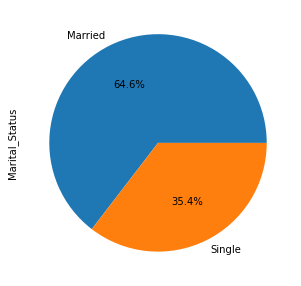

In [24]:
plt.figure(figsize= (10,7), facecolor='white') # set white background
mkt_df['Marital_Status'].value_counts().plot.pie(figsize=(7, 5), autopct='%.1f%%');

2. Phân bố học vấn của khách hàng khảo sát

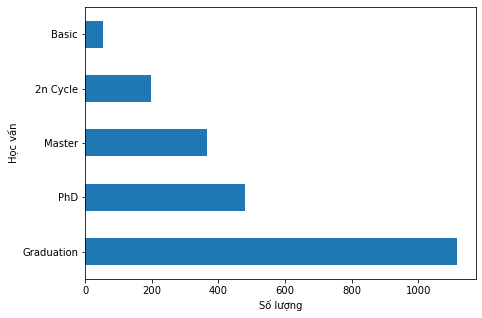

In [25]:
mkt_df['Education'].value_counts().plot.barh(figsize=(7, 5))
plt.xlabel("Số lượng")
plt.ylabel("Học vấn");

3. Phân bố số con của khách hàng

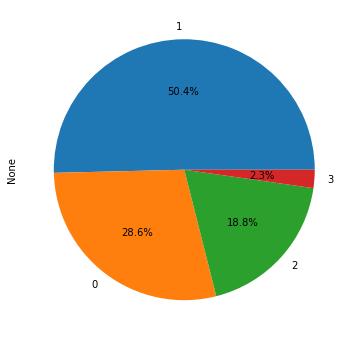

In [26]:
# plt.figure(figsize= (10,7), facecolor='white') # set white background
num_child = mkt_df['Kidhome'] + mkt_df['Teenhome']
num_child.value_counts().plot.pie(figsize=(8, 6), autopct='%.1f%%');

$\to$ Như vậy có khoảng 71.5% khách hàng có con, cũng khá nhiều...Ta sẽ tận dụng thông tin này sau

4. Thống kê số lượt mua hàng qua các nền tảng 

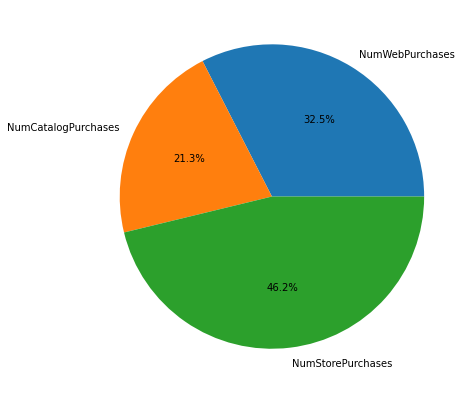

In [27]:
plt.figure(figsize= (10,7), facecolor='white') # set white background
platforms = mkt_df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()
plt.pie(platforms, labels= platforms.index, autopct='%.1f%%');

5. Thống kê tỷ lệ khách hàng tham gia từng chiến dịch marketing

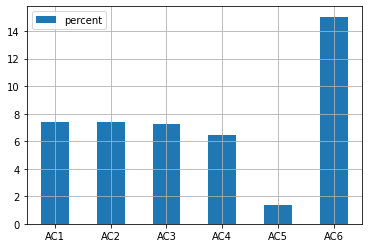

In [64]:
pct_cmp = mkt_df.filter(regex='(AcceptedCmp)').sum() / mkt_df.shape[0] * 100
pct_cmp.to_frame(name='percent').plot.bar(rot=0, grid=True)
plt.xticks(range(0,6), [f'AC{i}' for i in range(1,7)]); # AC = Accepted Campaign

$\to$ Phần lớn khách hàng đồng ý mua hàng ở chiến dịch markting cuối cùng

6. Phân bố tuổi như thế nào?

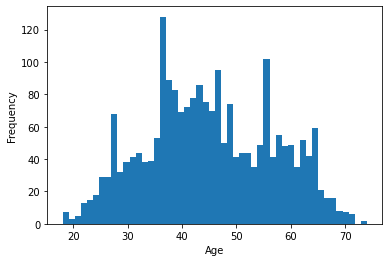

In [53]:
mkt_df['Age'].plot.hist(bins=50);
plt.xlabel('Age');

7. Phân bố thu nhập khách hàng như thế nào?

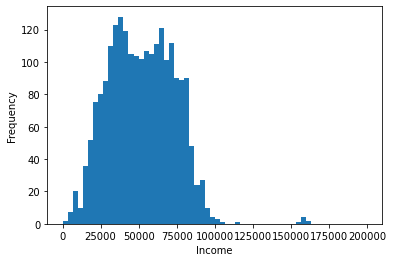

In [56]:
mkt_df['Income'].plot.hist(bins=60, range=(0,200000))
plt.xlabel('Income');

$\to$ Như vậy phần lớn khách hàng có thu nhập nằm trong khoảng [0, 100K]

8. Lượng mua qua các hình thức: Web, trực tiếp tại cửa hàng (Store), danh mục quảng cáo (Catalog) phân bố như thế nào? So sánh giữa 3 hình thức này xem hình thức nào ưu thế hơn?

Text(0.5, 0, 'products')

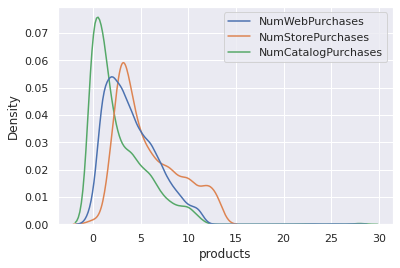

In [161]:
df = mkt_df[['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']]
sns.kdeplot(data=df);
plt.xlabel('products');

1. Số lượng mua hàng qua 3 hình thức: Store > Web > Catalog
2. Nhìn chung phần lớn đơn hàng có dưới 4 sản phẩm ở cả 3 hình thức 
3. Nhìn chung số mặt hàng trong 1 đơn hàng bất kỳ nằm trong khoảng [0, 15]

## II. Các câu hỏi in-depth

Danh sách câu hỏi:

1. 
2. 

## Ứng với mỗi sản phẩm công ty, phân khúc khách hàng nào sẽ mua sản phẩm đó nhiều nhất?
Lợi ích: Xác định được khách hàng mục tiêu. Từ đó nhắm sản phẩm tương ứng tới phân khúc khách hàng đó để tối đa hóa số lượng sản phẩm bán ra. Từ đó tăng doanh thu cho công ty

**"phân khúc khách hàng"** sẽ được quyết định dựa trên:
- Nhân khẩu học: Tuổi (`Age`), thu nhập (`Income`), và học vấn (`Education`), Số lượng con cái (`NumChild`) và tình trạng hôn nhân (`Marital_Status`)
- Hành vi mua hàng: 
    - Tính cách mua hàng - tức khách có mua hàng ở lần marketing thứ i không (`AcceptedCmp`<font color='blue'>i</font> với <font color='blue'>i</font>=1..6) 
    - Nơi thực hiện mua hàng (`NumWebPurchases`, `NumCatalogPurchases` hay `NumStorePurchases`)

**"sản phẩm công ty"** chính là 6 sản phẩm hiện có trong tập dữ liệu: [`MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`]

---

### Tiền xử lý
- Bước 1: thêm cột `NumChild` vào `customer_seg` để thể hiện số con của từng khách hàng. Tận dụng Series `num_child` ở mục I.3 -> Xong bước 1
- Bước 2: mã hóa cột `AcceptedCmp`<font color='blue'>i</font> thành chuỗi 6 bit được đánh chỉ số từ 1 -> 6 từ trái qua phải, mỗi bit i ứng với  `AcceptedCmp`<font color='blue'>i</font>
- Bước 3: phân cột `Income` thành 3 nhóm category: [Low, Low to medium, Medium, High] tương ứng với tứ phân vị   
- Bước 4: phân cột `Age` thành các nhóm: ['Young', 'Mature', 'Midlle-age', 'Old']
- Bước 5: chuẩn bị dataframe `customer_seg` gồm các cột đã đề cập để chuẩn bị cho quá trình phân tích dữ liệu sắp tới

In [31]:
# Code bước 2
cmp = mkt_df.filter(regex='AcceptedCmp').astype(str) # đổi các cột AcceptedCmpi sang kiểu string
cmp = cmp.sum(axis=1, numeric_only=False) # cộng chuỗi 6 cột này theo axis=1

In [78]:
# Code bước 3
income_group = ['Low', 'Low to medium', 'Medium', 'High']
income = pd.qcut(mkt_df['Income'], q=4, labels=income_group)
income

0              Medium
1       Low to medium
2                High
3                 Low
4              Medium
            ...      
2235           Medium
2236           Medium
2237           Medium
2238             High
2239           Medium
Name: Income, Length: 2213, dtype: category
Categories (4, object): ['Low' < 'Low to medium' < 'Medium' < 'High']

In [33]:
# Code bước 4
age_group = ['Young', 'Mature', 'Midlle-age', 'Old']
age_range = [0, 30, 45, 65, 101] # từng cặp là từng nhóm tuổi. VD: [0-30] tuổi, [30-45] tuổi
age = pd.cut(mkt_df['Age'], bins=age_range, labels=age_group)

In [34]:
mkt_df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'AcceptedCmp6', 'Age'],
      dtype='object')

In [35]:
# Code bước 5
accepted_cmp = ['AcceptedCmp'+str(i) for i in range(1,7)]
cols = ['Education', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'MntWines', 'MntFruits', 'MntMeatProducts',\
        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Marital_Status'] + accepted_cmp
customer_seg = mkt_df[cols].copy()

# add columns
customer_seg['Age'] = age # add cột Age
customer_seg['Income'] = income # add cột Income
# customer_seg['Cmp'] = cmp # add cột Cmp

customer_seg['NumChild'] = num_child # add cột NumChild

# đổi lại tên cột cho ngắn và dễ nhìn
customer_seg.rename(columns = {'MntWines': 'Wines', 'MntFruits': 'Fruits', 
                               'MntMeatProducts': 'Meats', 'MntFishProducts': 'Fish', 
                               'MntSweetProducts': 'Sweets', 'MntGoldProds': 'Golds',
                               'NumWebPurchases': 'Web', 'NumCatalogPurchases': 'Catalog',
                               'NumStorePurchases': 'Store', 'Education': 'Edu', 
                               'Marital_Status': 'Relationship'}, inplace=True)

customer_seg.head()

,Edu,Web,Catalog,Store,Wines,Fruits,Meats,Fish,Sweets,Golds,Relationship,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Age,Income,NumChild
0,Graduation,8,10,4,635,88,546,172,88,88,Single,0,0,0,0,0,1,Midlle-age,Medium,0
1,Graduation,1,1,2,11,1,6,2,1,6,Single,0,0,0,0,0,0,Midlle-age,Low to medium,2
2,Graduation,8,2,10,426,49,127,111,21,42,Married,0,0,0,0,0,0,Midlle-age,High,0
3,Graduation,2,0,4,11,4,20,10,3,5,Married,0,0,0,0,0,0,Young,Low,1
4,PhD,5,3,6,173,43,118,46,27,15,Married,0,0,0,0,0,0,Mature,Medium,1


### Phân tích: 
Dataframe `customer_seg` hiện đang lưu thông tin về 6 cột Products + 5 cột thông tin cá nhân + 4 cột hành vi mua hàng
- 6 cột Products: [`Wines`, `Fruits`, `Meats`, `Fish`, `Sweets`, `Golds`]
- 5 cột thông tin cá nhân: [`Age`, `Income`, `Edu`, `NumChild`, `Relationship`]
- 4 cột hành vi mua hàng: [`Web`, `Catalog`, `Store`, `Cmp`]

Ta phân tích ứng với từng sản phẩm trong Products thì phân khúc khách hàng của sản phẩm đó bao gồm những khách hàng có tính chất như thế nào? (VD: ứng với sản phẩm **Wines** thì những khách hàng có `Relationship=Single`,... có xu hướng mua nhiều hơn). Tóm tắt các bước làm (sẽ nói chi tiết ở từng bước)
- Bước 1: với mỗi sản phẩm, thống kê top các khách hàng mua sản phẩm đó nhiều nhất. "Top các khách hàng mua nhiều nhất" được dựa trên tứ phân vị [0.75, 1] của từng cột sản phẩm và được lưu vào dataframe `top_customers`
- Bước 2 (dự đoán phân khúc khách hàng): với mỗi một top khách hàng tìm dược ở bước 1, tìm ra điểm chung **lớn nhất** của các khách hàng này là gì dựa theo **thông tin cá nhân** và **hành vi mua hàng**. Kết quả là 1 dataframe `cust_by_prod` gồm 6 cột tương ứng 6 sản phẩm và 9 dòng = 5 dòng **thông tin cá nhân** + 4 dòng **hành vi mua hàng**

#### Code bước 1
- Định nghĩa 1 hàm hợp top_customers_ix(s) nhận vào s là 1 cột product, trả ra chỉ số index của top khách hàng mua sản phẩm s và số lượng mua của những khách này phải nằm trong khoảng phân vị [0.75, 1]. 
- Sau đó áp dụng hàm hợp này lên cho 6 cột products 

In [36]:
def top_customers_ix(s): # ix = index
    major_buy_mnt = pd.qcut(s, [.75, 1]) # lấy các dòng có SL mua món hàng thuộc vào phân vị cuối
    cust_ix = major_buy_mnt[~major_buy_mnt.isna()].index # lấy index các dòng thỏa DK trên, cũng là index các khách hàng
    return cust_ix.to_list() # return danh sách index khách hàng

products = ['Wines', 'Fruits', 'Meats', 'Fish', 'Sweets', 'Golds']
top_customers = customer_seg[products].agg([top_customers_ix])
top_customers

,Wines,Fruits,Meats,Fish,Sweets,Golds
top_customers_ix,"[0, 5, 15, 18, 22, 29, 36, 49, 51, 53, 55, 60, 62, 63, 67, 69, 73, 76, 77, 79, 96, 103, 111, 112, 116, 124, 131, 135, 140, 141, 143, 145, 154, 155, 159, 161, 163, 175, 176, 182, 188, 196, 197, 202, 203, 209, 211, 217, 219, 222, 224, 227, 228, 231, 234, 240, 243, 244, 246, 247, 248, 249, 254, 256, 261, 270, 275, 279, 292, 295, 299, 301, 305, 307, 308, 313, 323, 325, 332, 336, 338, 342, 351, 353, 354, 357, 358, 360, 361, 368, 369, 373, 378, 387, 389, 390, 394, 395, 401, 412, ...]","[0, 2, 4, 5, 6, 12, 18, 29, 34, 40, 45, 49, 51, 53, 55, 56, 64, 68, 69, 70, 72, 76, 77, 88, 99, 102, 103, 104, 107, 109, 110, 113, 116, 117, 120, 125, 126, 130, 132, 140, 144, 168, 175, 176, 198, 201, 202, 209, 228, 231, 240, 241, 243, 247, 248, 252, 253, 257, 261, 266, 268, 270, 276, 277, 286, 288, 292, 305, 313, 317, 323, 335, 336, 338, 345, 347, 350, 351, 353, 357, 360, 368, 387, 390, 392, 394, 401, 403, 411, 413, 414, 418, 423, 424, 426, 432, 433, 436, 447, 451, ...]","[0, 12, 18, 21, 29, 34, 40, 45, 49, 51, 53, 55, 56, 60, 64, 67, 69, 70, 72, 76, 77, 84, 88, 98, 103, 104, 107, 110, 111, 116, 126, 135, 140, 141, 142, 155, 159, 161, 163, 164, 168, 175, 179, 188, 191, 197, 198, 201, 202, 209, 211, 214, 217, 221, 228, 234, 240, 241, 243, 246, 248, 252, 254, 266, 268, 270, 277, 278, 287, 288, 292, 298, 307, 313, 323, 325, 335, 336, 338, 340, 347, 350, 351, 352, 353, 357, 360, 366, 368, 373, 390, 392, 395, 414, 415, 417, 424, 426, 427, 430, ...]","[0, 2, 6, 12, 15, 17, 20, 34, 39, 40, 45, 49, 53, 55, 56, 60, 64, 67, 69, 70, 72, 76, 77, 88, 98, 99, 102, 103, 104, 107, 116, 117, 126, 130, 140, 144, 159, 166, 168, 175, 176, 179, 188, 191, 198, 201, 203, 210, 214, 221, 228, 231, 240, 241, 243, 246, 247, 248, 249, 266, 268, 270, 276, 277, 282, 286, 287, 288, 292, 298, 305, 313, 317, 323, 335, 336, 340, 345, 347, 351, 353, 357, 358, 360, 366, 368, 382, 392, 395, 401, 411, 413, 415, 417, 418, 424, 426, 429, 432, 447, ...]","[0, 5, 6, 12, 15, 20, 29, 34, 39, 40, 49, 50, 51, 53, 55, 56, 64, 68, 70, 72, 77, 84, 88, 99, 102, 103, 107, 110, 111, 116, 117, 120, 124, 130, 132, 135, 140, 142, 143, 145, 159, 168, 175, 176, 188, 191, 197, 198, 202, 203, 211, 214, 217, 228, 231, 237, 240, 241, 248, 249, 252, 254, 266, 268, 270, 276, 278, 286, 287, 288, 298, 305, 307, 313, 325, 335, 336, 340, 345, 347, 350, 351, 357, 360, 366, 368, 382, 387, 390, 392, 399, 401, 411, 413, 418, 423, 426, 427, 429, 432, ...]","[0, 18, 24, 31, 40, 45, 53, 54, 55, 60, 62, 68, 69, 72, 83, 84, 88, 96, 98, 102, 103, 107, 110, 111, 112, 114, 117, 124, 125, 126, 130, 132, 142, 144, 152, 154, 159, 168, 176, 179, 182, 187, 191, 198, 199, 201, 203, 209, 215, 218, 224, 226, 227, 243, 244, 246, 247, 248, 249, 252, 266, 267, 268, 270, 276, 279, 281, 283, 286, 287, 292, 305, 320, 323, 325, 335, 338, 345, 347, 351, 360, 364, 365, 368, 373, 378, 386, 387, 389, 390, 392, 394, 403, 414, 418, 423, 427, 429, 431, 432, ...]"


#### Code bước 2
Để code được bước 2, ta sẽ thử nghiệm với 1 cột `Wines` trước để biết được output có hình dáng ra sao. Sau đó mới tính toán và áp dụng cho 6 cột products

a) Thử nghiệm với cột `Wines`

Đầu tiên, định nghĩa hàm hợp `most_freq_val` để áp lên 9 cột: [`Age`, `Income`, `Edu`, `NumChild`, `Relationship`, `Web`, `Catalog`, `Store`, `Cmp`]. Hàm này sẽ tính tần số xuất hiện của từng <font color=green>**giá trị của thuộc tính**</font> (sử dụng value_counts()) và tìm ra <font color=green>**giá trị của thuộc tính**</font> nào có tần số xuất hiện nhiều nhất ("nhiều nhất" theo nghĩa là tần số xuất hiện thuộc khoảng phân vị [0.51, 1] - hay hơn 1 nửa).\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<u>VD</u>: Xét thuộc tính `Relationship` có <font color=green>**giá trị của thuộc tính**</font> = ['Married', 'Single'] với tần số xuất hiện lần lượt là [400, 100], thấy rằng trong khoảng phân vị [0.51, 1] chỉ có giá trị 'Married' thỏa nên hàm sẽ trả về ['Married']

In [37]:
def most_freq_val(s):
    # lọc ra các giá trị của thuộc tính s có tần số xuất hiện nhiều trong khoảng phân vị [0.75, 1].
    # Kết quả: là 1 Series với Series.index = [tên giá trị của thuộc tính] và Series.data là NaN (nếu tần số không nằm trong  
    ## khoảng phân vị [0.51, 1]) và các giá trị khác NaN (nếu tần số nằm trong khoảng phân vị [0.75, 1])
    top_vals = pd.qcut(s.value_counts(), [0.51, 1]) 
    
    # lọc ra index (chính là tên giá trị thuộc tính) của tần số xuất hiện trong khoảng phân vị [0.75, 1] (tức khác NaN)
    # Kết quả: là 1 mảng bool
    top_vals_ix = ~top_vals.isna()
    
    # Lọc ra Series.index thỏa True trong top_vals_ix và convert sang dạng list
    top_vals = top_vals[top_vals_ix].index.to_list()
    return top_vals

Tiếp theo:
- Lọc ra index nhóm khách hàng của sản phẩm `Wines` từ dataframe `top_customers` và lưu những index này vào biến `cust_ix`
- Từ index, lấy được thông tin khách hàng (thông tin cá nhân + thông tin hành vi) của nhóm khách hàng này và lưu vào biến `cust`
- Áp dụng hàm hợp lên từng cột thông tin khách hàng của `cust` để biết phần lớn nhóm khách mua nhiều `Wines` sẽ có đặc điểm là gì

In [38]:
cust_ix = top_customers.loc['top_customers_ix', 'Wines'] # lọc ra index nhóm khách hàng của Wines
cust = customer_seg.loc[cust_ix, ~customer_seg.columns.isin(products)] # lấy thông tin cá nhân + thông tin hành vi của nhóm này
cust_of_wines = cust.agg([most_freq_val]).iloc[0] # Kết quả là dataframe 1 dòng nên lấy dòng đầu là đủ
cust_of_wines

Edu                [Graduation, PhD]
Web                  [4, 5, 6, 7, 3]
Catalog              [4, 6, 3, 5, 2]
Store              [10, 5, 8, 9, 12]
Relationship               [Married]
AcceptedCmp1                     [0]
AcceptedCmp2                     [0]
AcceptedCmp3                     [0]
AcceptedCmp4                     [0]
AcceptedCmp5                     [0]
AcceptedCmp6                     [0]
Age             [Midlle-age, Mature]
Income                [High, Medium]
NumChild                      [0, 1]
Name: most_freq_val, dtype: object

Như vậy, với 1 cột `Wines`, ta biết được rằng phần lớn khách hàng có các đặc điểm như: đã tốt nghiệp, độ tuổi tầm trung niên (Middle-age), thu nhập cao, ....Bây giờ ta đã sẵn sàng để mở rộng làm cho cả 6 cột

b) Làm trực tiếp trên 6 cột products của `top_customers`

- Định nghĩa hàm hợp `feature(prod)` với `prod` là cột Series sản phẩm trong `top_customers`. Công việc của hàm này giống y hệt cell code ngay phía trên, chỉ đổi tên biến và thay vì làm cho 1 cột thì sẽ làm cho cột `prod` bất kỳ

In [39]:
def feature(prod):
    cust_ix = top_customers.loc['top_customers_ix', prod.name] # lọc ra index nhóm khách hàng của prod
    cust = customer_seg.loc[cust_ix, ~customer_seg.columns.isin(products)] # lấy thông tin cá nhân + thông tin hành vi của nhóm này
    cust_of_prod = cust.agg([most_freq_val]).iloc[0] # Kết quả là dataframe 1 dòng nên lấy dòng đầu là đủ
    return cust_of_prod # kết quả là Series như cell code ngay trên

final_cust_segmentation = top_customers.agg([feature])
final_cust_segmentation

,Wines,Fruits,Meats,Fish,Sweets,Golds
,feature,feature,feature,feature,feature,feature
Edu,"[Graduation, PhD]","[Graduation, PhD]","[Graduation, PhD]","[Graduation, PhD]","[Graduation, PhD]","[Graduation, Master]"
Web,"[4, 5, 6, 7, 3]","[4, 5, 3, 6, 7]","[4, 5, 3, 6, 7, 8]","[4, 5, 3, 6, 7]","[4, 5, 6, 3, 7, 8]","[5, 4, 6, 7, 3, 8]"
Catalog,"[4, 6, 3, 5, 2]","[4, 2, 6, 3, 5, 7]","[6, 5, 4, 7, 3, 10]","[4, 3, 6, 5, 2, 7]","[4, 6, 5, 3, 2, 7]","[2, 3, 4, 5, 6, 1]"
Store,"[10, 5, 8, 9, 12]","[10, 8, 6, 7, 12]","[6, 10, 5, 12, 7, 8, 9]","[5, 6, 10, 8, 12]","[10, 8, 6, 5, 7, 13]","[5, 8, 6, 12, 7, 9, 10]"
Relationship,[Married],[Married],[Married],[Married],[Married],[Married]
AcceptedCmp1,[0],[0],[0],[0],[0],[0]
AcceptedCmp2,[0],[0],[0],[0],[0],[0]
AcceptedCmp3,[0],[0],[0],[0],[0],[0]
AcceptedCmp4,[0],[0],[0],[0],[0],[0]


Vì output còn "hơi xấu" do:

- `final_cust_segmentation.columns` có 2 level:
    - level=0: Wines, Fruits, Meats, Fish, Sweets, Golds
    - level=1: feature, feature, feature, feature, feature, feature 

<p> $\to$ Bỏ đi level=1 để nhìn đẹp và gọn hơn (sử dụng `DataFrame.droplevel`) 
  
- 3 cột `Web`, `Catalog`, `Store` có thể hiện dạng list khó nhìn và khó thống kê  

<p> $\to$ Lấy mean mỗi cột 

In [40]:
final_cust_segmentation = final_cust_segmentation.droplevel(level=1, axis=1)
final_cust_segmentation.loc[['Web', 'Catalog', 'Store']] = final_cust_segmentation.loc[['Web', 'Catalog', 'Store']].applymap(lambda lst: np.mean(lst).round())
final_cust_segmentation

,Wines,Fruits,Meats,Fish,Sweets,Golds
Edu,"[Graduation, PhD]","[Graduation, PhD]","[Graduation, PhD]","[Graduation, PhD]","[Graduation, PhD]","[Graduation, Master]"
Web,5.0,5.0,6.0,5.0,6.0,6.0
Catalog,4.0,4.0,6.0,4.0,4.0,4.0
Store,9.0,9.0,8.0,8.0,8.0,8.0
Relationship,[Married],[Married],[Married],[Married],[Married],[Married]
AcceptedCmp1,[0],[0],[0],[0],[0],[0]
AcceptedCmp2,[0],[0],[0],[0],[0],[0]
AcceptedCmp3,[0],[0],[0],[0],[0],[0]
AcceptedCmp4,[0],[0],[0],[0],[0],[0]
AcceptedCmp5,[0],[0],[0],[0],[0],[0]


Như vậy, có thể bắt đầu rút trích insights từ đây

1. Đặc điểm chung của những người hay mua từng loại trong 6 sản phẩm này là họ thường: (tốt nghiệp bậc đại học trở lên), (hay mua hàng tại cửa hàng), (đã cưới), (người trưởng thành hoặc trung niên), (đạt lương vừa/cao), (không có hoặc có 1 con) và (không cần thông qua các chiến dịch marketing mới mua hàng - `AcceptedCmp`**i**)


2. Các khách hàng này phần lớn vẫn ưa chuộng việc mua sắm trực tiếp tại cửa hàng $\to$ Cần duy trì, nâng cấp các chi nhánh cửa hàng của công ty 


3. Với nền tảng Web công ty, lượng người mua nhìn chung khá tốt. Riêng với thịt (Meats), đồ ngọt (Sweets) và vàng (Golds) được khách hàng mua online nhiều hơn các món khác $\to$ Đây có thể là 3 món hàng tiềm năng nên cần tăng số lượng 3 mặt hàng này nhưng vẫn đảm bảo chất lượng và có thể kèm theo khuyến mãi để lôi kéo nhiều khách hàng hơn. Với 3 mặt hàng còn lại, khách hàng cũng ưa chuộng không kém nên ta có thể tăng cường các hình thức khuyến mãi hoặc marketing các mặt hàng này nhiều hơn nữa


4. Khách hàng có xu hướng mua nhiều thịt hơn các mặt hàng còn lại thông qua các ấn phẩm/danh mục quảng cáo (Catalog) 

## Mức độ chi tiêu của những khách hàng có con?

Lợi ích: nắm được việc chi tiêu nhiều hay ít của mỗi khách hàng có con, ta sẽ biết cách họ chi tiêu với mỗi sản phẩm như thế nào và hành vi mua hàng của họ

Lý do khảo sát nhóm khách hàng này: Như ta đã biết mục I.3, có 71.5% khách hàng có con - chiếm hơn 2/3 số lượng khách hàng. Như vậy là đủ để ta tò mò về nhóm khách hàng này

In [41]:
parent = mkt_df.drop(columns=['Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Complain', 'ID']).rename(columns={
    'MntWines': 'Wines', 'MntFruits': 'Fruits', 
   'MntMeatProducts': 'Meats', 'MntFishProducts': 'Fish', 
   'MntSweetProducts': 'Sweets', 'MntGoldProds': 'Golds',
   'NumWebPurchases': 'Web', 'NumCatalogPurchases': 'Catalog',
   'NumStorePurchases': 'Store', 'Education': 'Edu', 
   'Marital_Status': 'Relationship', 'NumDealsPurchases': 'TotalDeals'
})

parent['NumChild'] = num_child
parent = parent[parent['NumChild'] > 0]
parent

,Edu,Relationship,Income,Wines,Fruits,Meats,Fish,Sweets,Golds,TotalDeals,Web,Catalog,Store,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,Age,NumChild
1,Graduation,Single,46344.0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,60,2
3,Graduation,Married,26646.0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,30,1
4,PhD,Married,58293.0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,33,1
5,Master,Married,62513.0,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,47,1
6,Graduation,Single,55635.0,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,Graduation,Married,34421.0,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,40,1
2235,Graduation,Married,61223.0,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,47,1
2236,PhD,Married,64014.0,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,68,3
2238,Master,Married,69245.0,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,58,1


In [151]:
parent_deals = parent.groupby('NumChild')[['Wines', 'Fruits', 'Meats', 'Fish', 'Sweets', 'Golds']].sum()
parent_deals

,Wines,Fruits,Meats,Fish,Sweets,Golds
NumChild,,,,,,
1,299910,21741,110807,29929,22519,45247
2,59133,3269,21504,4694,3456,10586
3,8067,299,2981,268,254,906


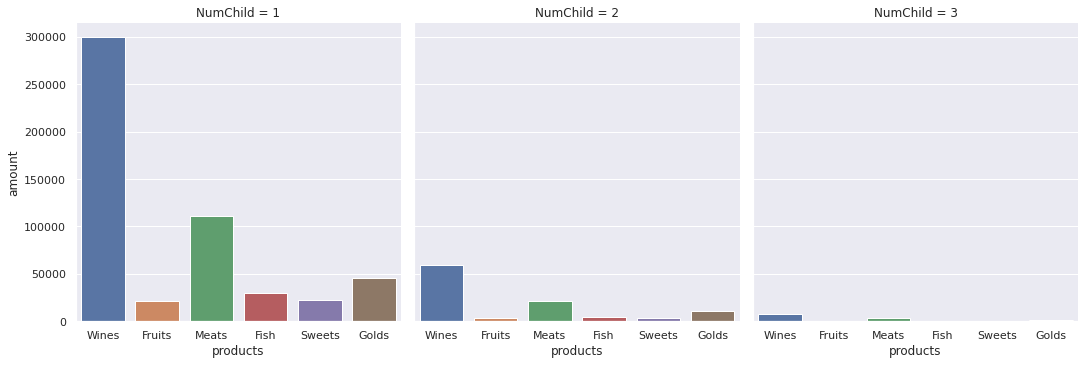

In [150]:
df = pd.melt(parent_deals.reset_index(), id_vars='NumChild', var_name= 'products', value_name='amount')
sns.catplot(x="products", y="amount", col="NumChild", data=df, kind="bar");
sns.set_theme(style="darkgrid")

Nhận xét:
1. Nhìn chung rượu vẫn là sản phẩm tiêu thụ số 1 trong các hộ gia đình có con. Riêng gia đình 1 con thì lượng tiêu thụ cao gấp khoảng 5 lần so với gia đình 2 con và cao gấp khoảng 30 lần so với 3 con!

2. Nhìn chung thịt vẫn là ưu tiên thứ 2 sau rượu ở các nhóm gia đình có con; thứ 3 là vàng (Gold). Các sản phẩm còn lại tiêu thụ 1 lượng không đáng kể so với các sản phẩm khác trong cùng nhóm

### Khách hàng có con thường chấp nhận offer vào lần marketing thứ mấy (So sánh với nhóm không có con xem thế nào)

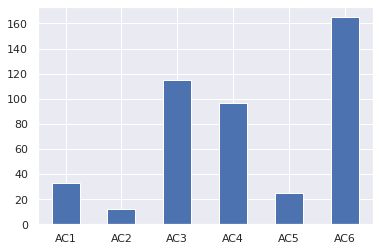

In [163]:
def say_yes(s):
    return s[s == 1].count()

parent_camp = parent[accepted_cmp]
labels = [f'AC{i}' for i in range(1,7)]
parent_camp.agg(say_yes).plot.bar(rot=0, grid=True)
plt.xticks(range(0,len(labels)), labels);

$\to$ Dễ thấy ngay ở lần marketing thứ 3,4 và 6, khách hàng có con có xu hướng dể chấp nhận mua hàng hơn. Thế khách hàng không con thì sao?

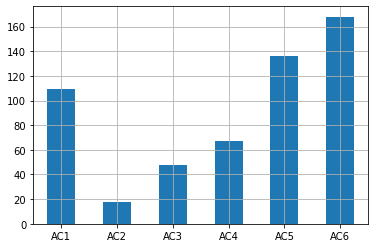

In [76]:
non_parent_ix = ~mkt_df.index.isin(parent.index)
non_parent = mkt_df.loc[non_parent_ix].copy()
non_parent = non_parent[accepted_cmp]
# non_parent['NumChild'] = num_child[non_parent_ix]
# non_parent['NumChild']

labels = [f'AC{i}' for i in range(1,7)]
non_parent.agg(say_yes).plot.bar(rot=0, grid=True)
plt.xticks(range(0,len(labels)), labels);

## Tổng số lượng đơn hàng của tất cả khách hàng

Lợi ích: nắm rõ được là công ty đang sa sút hay bình ổn, hay có nhiều đơn hàng đồng nghĩa với việc thu về lợi nhuận nhiều hơn

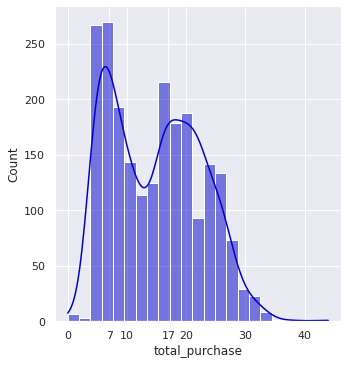

In [155]:
total_buy = mkt_df['NumWebPurchases'] + mkt_df['NumCatalogPurchases'] + mkt_df['NumStorePurchases'] \
                                                                      + mkt_df['NumDealsPurchases']
# tìm x mà tại đó y đạt max
freq = total_buy.value_counts()
peek_1 = freq[freq.index.isin(range(1,11))].idxmax()
peek_2 = freq[freq.index.isin(range(15,20))].idxmax()

g = sns.displot(total_buy,color = 'mediumblue', kde=True);
plt.xticks([0, peek_1, 10, peek_2, 20, 30, 40]);
plt.xlabel('total_purchase');

$\to$ Đồ thị có 2 đỉnh. Có vẻ như số lượng đơn hàng 7 món và 17 món khá phổ biến từ ngày có được dataset này tới khoảng năm cuối năm 2014

## Với nhóm khách hàng mua hàng ít hơn trung bình, có điều gì ở họ mà làm cho việc mua sản phẩm ở công ty thấp thế?

In [104]:
sns.displot(x='weight', data=mkt_df, kind='kde', hue='origin');

range(0, 45)